## Keras -- MLPs on MNIST

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [80]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [82]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [83]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [85]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [86]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

 <h3>  MLP + Relu activation + ADAM with 2 hidden layers </h3>

In [89]:
# Multilayer perceptron

model_relu = Sequential()
model_relu.add(Dense(392, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dense(196, activation='relu'))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_81 (Dense)             (None, 196)               77028     
_________________________________________________________________
dense_82 (Dense)             (None, 10)                1970      
Total params: 386,718
Trainable params: 386,718
Non-trainable params: 0
_________________________________________________________________


In [90]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.2401 - acc: 0.9304 - val_loss: 0.1109 - val_acc: 0.9654
Epoch 2/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0881 - acc: 0.9730 - val_loss: 0.0822 - val_acc: 0.9752
Epoch 3/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0581 - acc: 0.9822 - val_loss: 0.0708 - val_acc: 0.9787
Epoch 4/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0388 - acc: 0.9879 - val_loss: 0.0707 - val_acc: 0.9793
Epoch 5/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0294 - acc: 0.9905 - val_loss: 0.0715 - val_acc: 0.9777
Epoch 6/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0215 - acc: 0.9932 - val_loss: 0.0878 - val_acc: 0.9750
Epoch 7/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0189 - acc: 0.9942 - val_loss: 0.0772 - val_ac

Test score: 0.08238437657678974
Test accuracy: 0.9832


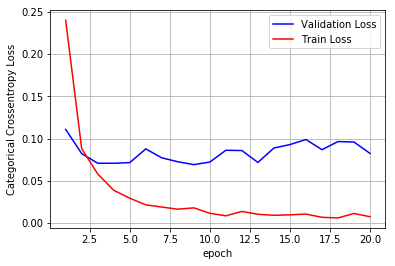

In [91]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

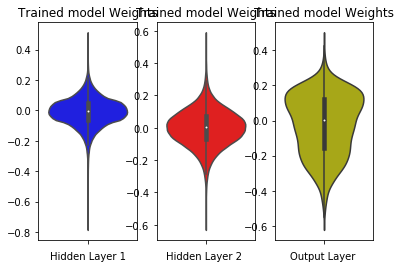

In [92]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 <h3>  MLP + Relu activation + ADAM + Batch Normalization with 2 hidden layers</h3>

In [94]:
# Multilayer perceptron
from keras.layers.normalization import BatchNormalization
model_relu = Sequential()
model_relu.add(Dense(392, activation='relu', input_shape=(input_dim,)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(196, activation='relu'))
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 392)               307720    
_________________________________________________________________
batch_normalization_32 (Batc (None, 392)               1568      
_________________________________________________________________
dense_87 (Dense)             (None, 196)               77028     
_________________________________________________________________
batch_normalization_33 (Batc (None, 196)               784       
_________________________________________________________________
dense_88 (Dense)             (None, 10)                1970      
Total params: 389,070
Trainable params: 387,894
Non-trainable params: 1,176
_________________________________________________________________


In [95]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.1823 - acc: 0.9451 - val_loss: 0.0967 - val_acc: 0.9684
Epoch 2/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0722 - acc: 0.9776 - val_loss: 0.0856 - val_acc: 0.9706
Epoch 3/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0473 - acc: 0.9853 - val_loss: 0.0844 - val_acc: 0.9756
Epoch 4/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0347 - acc: 0.9886 - val_loss: 0.0809 - val_acc: 0.9756
Epoch 5/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0266 - acc: 0.9918 - val_loss: 0.0852 - val_acc: 0.9759
Epoch 6/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0219 - acc: 0.9928 - val_loss: 0.0974 - val_acc: 0.9721
Epoch 7/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0219 - acc: 0.9925 - val_loss: 0.0731 - val_ac

Test score: 0.08495574688926236
Test accuracy: 0.9826


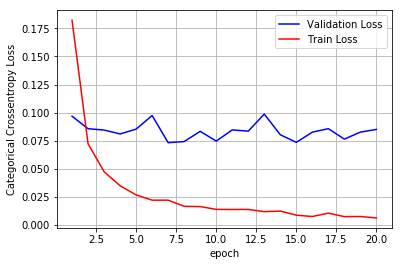

In [96]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

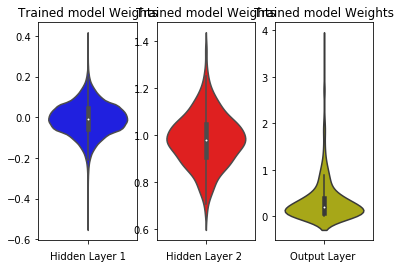

In [97]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 <h3>  MLP + Relu activation + ADAM + Dropout with 2 hidden layers</h3>

In [98]:
# Multilayer perceptron
from keras.layers import Dropout
model_relu = Sequential()
model_relu.add(Dense(392, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(196, activation='relu'))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 392)               307720    
_________________________________________________________________
dropout_27 (Dropout)         (None, 392)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 196)               77028     
_________________________________________________________________
dropout_28 (Dropout)         (None, 196)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 10)                1970      
Total params: 386,718
Trainable params: 386,718
Non-trainable params: 0
_________________________________________________________________


In [99]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.4348 - acc: 0.8656 - val_loss: 0.1421 - val_acc: 0.9565
Epoch 2/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.2000 - acc: 0.9408 - val_loss: 0.1090 - val_acc: 0.9655
Epoch 3/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.1494 - acc: 0.9550 - val_loss: 0.0946 - val_acc: 0.9688
Epoch 4/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1313 - acc: 0.9604 - val_loss: 0.0796 - val_acc: 0.9754
Epoch 5/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.1161 - acc: 0.9648 - val_loss: 0.0798 - val_acc: 0.9763
Epoch 6/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.1044 - acc: 0.9688 - val_loss: 0.0734 - val_acc: 0.9768
Epoch 7/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.0943 - acc: 0.9708 - val_loss: 0.0693 - val_ac

Test score: 0.06188290925989168
Test accuracy: 0.9831


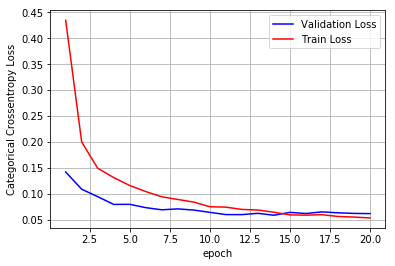

In [100]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

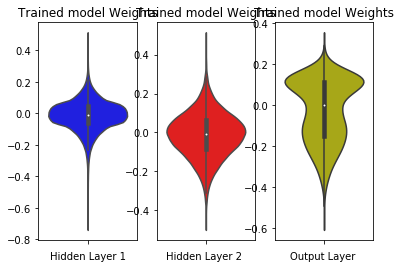

In [101]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 <h3>  MLP + Relu activation + ADAM + Batch Normalization + Dropout with 2 hidden layers</h3>

In [102]:
# Multilayer perceptron
model_relu = Sequential()
model_relu.add(Dense(392, activation='relu', input_shape=(input_dim,)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(196, activation='relu'))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 392)               307720    
_________________________________________________________________
batch_normalization_34 (Batc (None, 392)               1568      
_________________________________________________________________
dropout_29 (Dropout)         (None, 392)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 196)               77028     
_________________________________________________________________
batch_normalization_35 (Batc (None, 196)               784       
_________________________________________________________________
dropout_30 (Dropout)         (None, 196)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 10)              

In [103]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.4204 - acc: 0.8732 - val_loss: 0.1443 - val_acc: 0.9536
Epoch 2/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.2023 - acc: 0.9399 - val_loss: 0.1098 - val_acc: 0.9676
Epoch 3/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.1625 - acc: 0.9502 - val_loss: 0.0939 - val_acc: 0.9713
Epoch 4/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.1393 - acc: 0.9569 - val_loss: 0.0881 - val_acc: 0.9740
Epoch 5/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.1219 - acc: 0.9622 - val_loss: 0.0764 - val_acc: 0.9758
Epoch 6/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.1136 - acc: 0.9644 - val_loss: 0.0725 - val_acc: 0.9768
Epoch 7/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.1054 - acc: 0.9673 - val_loss: 0.0713 - val_ac

Test score: 0.05690854531452642
Test accuracy: 0.9829


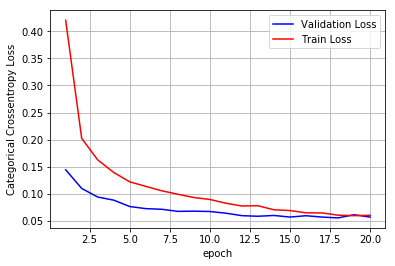

In [104]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

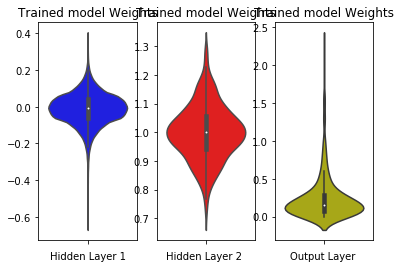

In [105]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 <h3>  MLP + Relu activation + ADAM with 3 hidden layers </h3>



In [106]:
# Multilayer perceptron

model = Sequential()
model.add(Dense(516, activation='relu', input_shape=(input_dim,)))
model.add(Dense(258, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(output_dim, activation='softmax'))

model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 516)               405060    
_________________________________________________________________
dense_96 (Dense)             (None, 258)               133386    
_________________________________________________________________
dense_97 (Dense)             (None, 50)                12950     
_________________________________________________________________
dense_98 (Dense)             (None, 10)                510       
Total params: 551,906
Trainable params: 551,906
Non-trainable params: 0
_________________________________________________________________


In [107]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.2391 - acc: 0.9292 - val_loss: 0.1139 - val_acc: 0.9644
Epoch 2/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0856 - acc: 0.9735 - val_loss: 0.0925 - val_acc: 0.9718
Epoch 3/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0548 - acc: 0.9827 - val_loss: 0.0658 - val_acc: 0.9782
Epoch 4/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0388 - acc: 0.9871 - val_loss: 0.0800 - val_acc: 0.9747
Epoch 5/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0295 - acc: 0.9904 - val_loss: 0.0662 - val_acc: 0.9792
Epoch 6/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0240 - acc: 0.9922 - val_loss: 0.0681 - val_acc: 0.9798
Epoch 7/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0203 - acc: 0.9935 - val_loss: 0.0837 - val_ac

Test score: 0.10599931993753521
Test accuracy: 0.9781


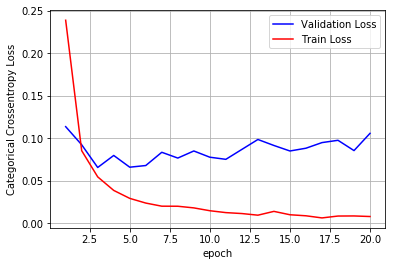

In [108]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

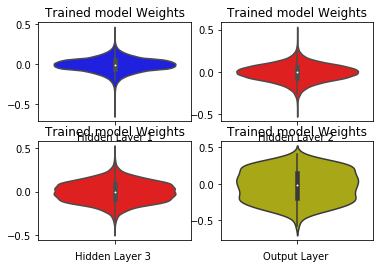

In [109]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 2, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 2, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 <h3>  MLP + Relu activation + ADAM + Batch Normalization with 3 hidden layers</h3>

In [110]:
# Multilayer perceptron
model = Sequential()
model.add(Dense(516, activation='relu', input_shape=(input_dim,)))
model.add(BatchNormalization())
model.add(Dense(258, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(output_dim, activation='softmax'))

model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 516)               405060    
_________________________________________________________________
batch_normalization_36 (Batc (None, 516)               2064      
_________________________________________________________________
dense_100 (Dense)            (None, 258)               133386    
_________________________________________________________________
batch_normalization_37 (Batc (None, 258)               1032      
_________________________________________________________________
dense_101 (Dense)            (None, 50)                12950     
_________________________________________________________________
batch_normalization_38 (Batc (None, 50)                200       
_________________________________________________________________
dense_102 (Dense)            (None, 10)              

In [111]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.1897 - acc: 0.9451 - val_loss: 0.0929 - val_acc: 0.9716
Epoch 2/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0750 - acc: 0.9768 - val_loss: 0.1012 - val_acc: 0.9685
Epoch 3/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0518 - acc: 0.9839 - val_loss: 0.1256 - val_acc: 0.9605
Epoch 4/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0376 - acc: 0.9879 - val_loss: 0.0757 - val_acc: 0.9767
Epoch 5/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0321 - acc: 0.9892 - val_loss: 0.0847 - val_acc: 0.9744
Epoch 6/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0263 - acc: 0.9913 - val_loss: 0.0889 - val_acc: 0.9744
Epoch 7/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0235 - acc: 0.9924 - val_loss: 0.0721 -

Test score: 0.06869542041149908
Test accuracy: 0.9834


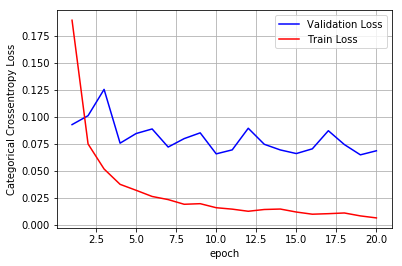

In [112]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

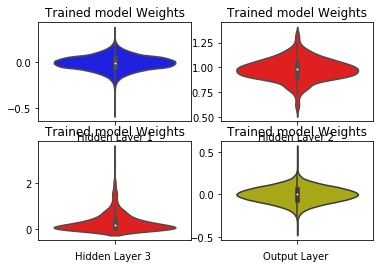

In [113]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 2, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 2, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 <h3>  MLP + Relu activation + ADAM + Dropout with 3 hidden layers</h3>

In [114]:
# Multilayer perceptron
from keras.layers import Dropout
model = Sequential()
model.add(Dense(516, activation='relu', input_shape=(input_dim,)))
model.add(Dropout(0.5))
model.add(Dense(258, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(output_dim, activation='softmax'))

model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 516)               405060    
_________________________________________________________________
dropout_31 (Dropout)         (None, 516)               0         
_________________________________________________________________
dense_104 (Dense)            (None, 258)               133386    
_________________________________________________________________
dropout_32 (Dropout)         (None, 258)               0         
_________________________________________________________________
dense_105 (Dense)            (None, 50)                12950     
_________________________________________________________________
dropout_33 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_106 (Dense)            (None, 10)              

In [115]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.6660 - acc: 0.7910 - val_loss: 0.1822 - val_acc: 0.9470
Epoch 2/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2760 - acc: 0.9281 - val_loss: 0.1292 - val_acc: 0.9633
Epoch 3/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.2154 - acc: 0.9452 - val_loss: 0.1217 - val_acc: 0.9668
Epoch 4/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.1818 - acc: 0.9538 - val_loss: 0.1014 - val_acc: 0.9720
Epoch 5/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.1591 - acc: 0.9598 - val_loss: 0.0941 - val_acc: 0.9744
Epoch 6/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.1517 - acc: 0.9611 - val_loss: 0.0908 - val_acc: 0.9758
Epoch 7/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.1353 - acc: 0.9656 - val_loss: 0.0834 - val_ac

Test score: 0.08326539741690445
Test accuracy: 0.9806


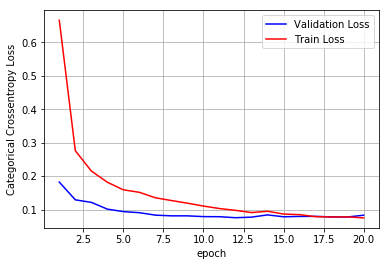

In [116]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

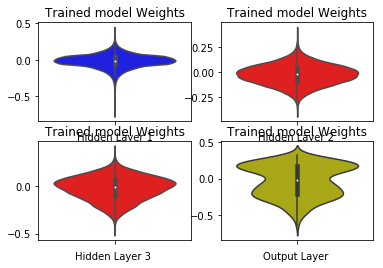

In [117]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 2, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 2, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 <h3>  MLP + Relu activation + ADAM + Batch Normalization + Dropout with 3 hidden layers</h3>

In [118]:
# Multilayer perceptron
model = Sequential()
model.add(Dense(516, activation='relu', input_shape=(input_dim,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(258, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim, activation='softmax'))

model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_107 (Dense)            (None, 516)               405060    
_________________________________________________________________
batch_normalization_39 (Batc (None, 516)               2064      
_________________________________________________________________
dropout_34 (Dropout)         (None, 516)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 258)               133386    
_________________________________________________________________
batch_normalization_40 (Batc (None, 258)               1032      
_________________________________________________________________
dropout_35 (Dropout)         (None, 258)               0         
_________________________________________________________________
dense_109 (Dense)            (None, 50)              

In [119]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.6016 - acc: 0.8208 - val_loss: 0.1655 - val_acc: 0.9496
Epoch 2/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.2661 - acc: 0.9245 - val_loss: 0.1257 - val_acc: 0.9626
Epoch 3/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.2046 - acc: 0.9420 - val_loss: 0.0984 - val_acc: 0.9698
Epoch 4/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.1768 - acc: 0.9500 - val_loss: 0.0972 - val_acc: 0.9707
Epoch 5/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.1571 - acc: 0.9556 - val_loss: 0.0872 - val_acc: 0.9749
Epoch 6/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.1387 - acc: 0.9602 - val_loss: 0.0818 - val_acc: 0.9764
Epoch 7/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.1307 - acc: 0.9643 - val_loss: 0.0770 -

Test score: 0.059158047910808816
Test accuracy: 0.9829


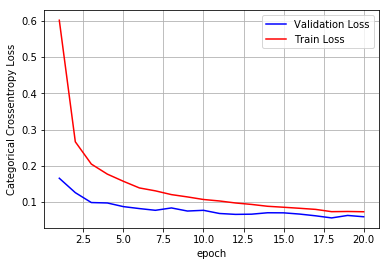

In [120]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

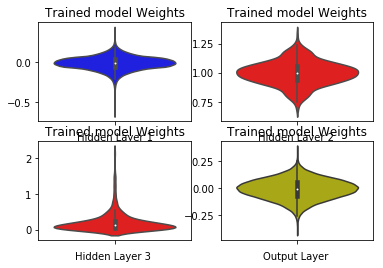

In [121]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 2, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 2, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 <h3>  MLP + Relu activation + ADAM with 5 hidden layers </h3>

In [122]:
# Multilayer perceptron

model2 = Sequential()
model2.add(Dense(645, activation='relu', input_shape=(input_dim,)))
model2.add(Dense(510, activation='relu'))
model2.add(Dense(387, activation='relu'))
model2.add(Dense(252, activation='relu'))
model2.add(Dense(129, activation='relu'))
model2.add(Dense(output_dim, activation='softmax'))

model2.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 645)               506325    
_________________________________________________________________
dense_112 (Dense)            (None, 510)               329460    
_________________________________________________________________
dense_113 (Dense)            (None, 387)               197757    
_________________________________________________________________
dense_114 (Dense)            (None, 252)               97776     
_________________________________________________________________
dense_115 (Dense)            (None, 129)               32637     
_________________________________________________________________
dense_116 (Dense)            (None, 10)                1300      
Total params: 1,165,255
Trainable params: 1,165,255
Non-trainable params: 0
___________________________________________

In [123]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.2283 - acc: 0.9299 - val_loss: 0.1040 - val_acc: 0.9682
Epoch 2/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0901 - acc: 0.9723 - val_loss: 0.0889 - val_acc: 0.9734
Epoch 3/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0650 - acc: 0.9804 - val_loss: 0.0925 - val_acc: 0.9730
Epoch 4/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0486 - acc: 0.9850 - val_loss: 0.0845 - val_acc: 0.9755
Epoch 5/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0412 - acc: 0.9877 - val_loss: 0.0768 - val_acc: 0.9798
Epoch 6/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0338 - acc: 0.9894 - val_loss: 0.0764 - val_acc: 0.9788
Epoch 7/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0281 - acc: 0.9915 - val_loss: 0.0843 - val_ac

Test score: 0.09155124295547798
Test accuracy: 0.9831


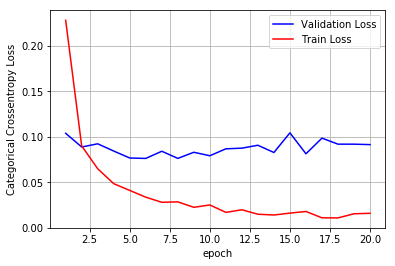

In [124]:
score = model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

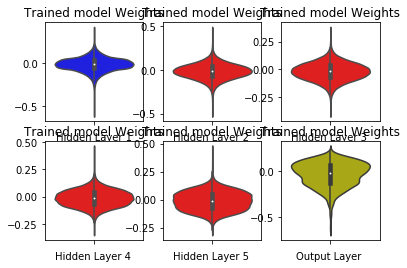

In [125]:
w_after = model2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 3, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(2, 3, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(2, 3, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 <h3>  MLP + Relu activation + ADAM + Batch Normalization with 5 hidden layers</h3>

In [126]:
# Multilayer perceptron

model2 = Sequential()
model2.add(Dense(645, activation='relu', input_shape=(input_dim,)))
model.add(BatchNormalization())
model2.add(Dense(510, activation='relu'))
model.add(BatchNormalization())
model2.add(Dense(387, activation='relu'))
model.add(BatchNormalization())
model2.add(Dense(252, activation='relu'))
model.add(BatchNormalization())
model2.add(Dense(129, activation='relu'))
model.add(BatchNormalization())
model2.add(Dense(output_dim, activation='softmax'))

model2.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 645)               506325    
_________________________________________________________________
dense_118 (Dense)            (None, 510)               329460    
_________________________________________________________________
dense_119 (Dense)            (None, 387)               197757    
_________________________________________________________________
dense_120 (Dense)            (None, 252)               97776     
_________________________________________________________________
dense_121 (Dense)            (None, 129)               32637     
_________________________________________________________________
dense_122 (Dense)            (None, 10)                1300      
Total params: 1,165,255
Trainable params: 1,165,255
Non-trainable params: 0
___________________________________________

In [127]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.2261 - acc: 0.9313 - val_loss: 0.1190 - val_acc: 0.9636
Epoch 2/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0934 - acc: 0.9722 - val_loss: 0.0854 - val_acc: 0.9738
Epoch 3/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0620 - acc: 0.9813 - val_loss: 0.0900 - val_acc: 0.9750
Epoch 4/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0478 - acc: 0.9849 - val_loss: 0.0846 - val_acc: 0.9777
Epoch 5/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0415 - acc: 0.9870 - val_loss: 0.0788 - val_acc: 0.9783
Epoch 6/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0323 - acc: 0.9900 - val_loss: 0.0745 - val_acc: 0.9801
Epoch 7/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0297 - acc: 0.9909 - val_loss: 0.0865 - val_a

Test score: 0.09110382709081515
Test accuracy: 0.983


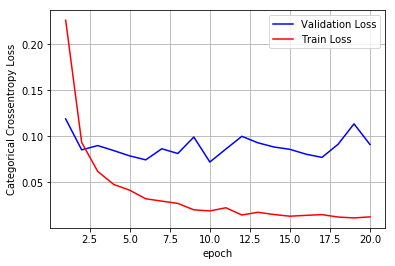

In [128]:
score = model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

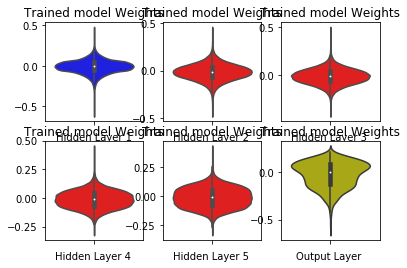

In [129]:
w_after = model2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 3, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(2, 3, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(2, 3, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 <h3>  MLP + Relu activation + ADAM + Dropout with 5 hidden layers</h3>

In [130]:
# Multilayer perceptron

model2 = Sequential()
model2.add(Dense(645, activation='relu', input_shape=(input_dim,)))
model2.add(Dropout(0.5))
model2.add(Dense(510, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(387, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(252, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(129, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(output_dim, activation='softmax'))

model2.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 645)               506325    
_________________________________________________________________
dropout_37 (Dropout)         (None, 645)               0         
_________________________________________________________________
dense_124 (Dense)            (None, 510)               329460    
_________________________________________________________________
dropout_38 (Dropout)         (None, 510)               0         
_________________________________________________________________
dense_125 (Dense)            (None, 387)               197757    
_________________________________________________________________
dropout_39 (Dropout)         (None, 387)               0         
_________________________________________________________________
dense_126 (Dense)            (None, 252)             

In [131]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.7789 - acc: 0.7449 - val_loss: 0.2111 - val_acc: 0.9400
Epoch 2/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.2748 - acc: 0.9308 - val_loss: 0.1316 - val_acc: 0.9643
Epoch 3/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2149 - acc: 0.9460 - val_loss: 0.1159 - val_acc: 0.9700
Epoch 4/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.1863 - acc: 0.9542 - val_loss: 0.1058 - val_acc: 0.9734
Epoch 5/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.1616 - acc: 0.9590 - val_loss: 0.0959 - val_acc: 0.9740
Epoch 6/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.1554 - acc: 0.9623 - val_loss: 0.0964 - val_acc: 0.9754
Epoch 7/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.1433 - acc: 0.9642 - val_loss: 0.0905 - val_a

Test score: 0.0790262889877944
Test accuracy: 0.983


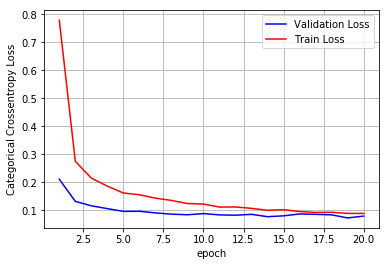

In [132]:
score = model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

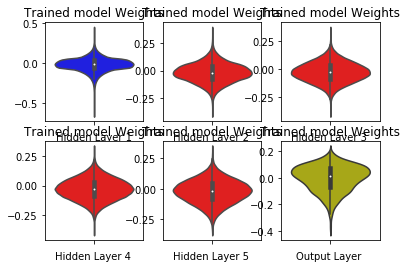

In [133]:
w_after = model2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 3, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(2, 3, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(2, 3, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 <h3>  MLP + Relu activation + ADAM + Batch Normalization + Dropout with 5 hidden layers</h3>

In [134]:
# Multilayer perceptron
model2 = Sequential()
model2.add(Dense(645, activation='relu', input_shape=(input_dim,)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(510, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(387, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(252, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(129, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(output_dim, activation='softmax'))

model2.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 645)               506325    
_________________________________________________________________
batch_normalization_47 (Batc (None, 645)               2580      
_________________________________________________________________
dropout_42 (Dropout)         (None, 645)               0         
_________________________________________________________________
dense_130 (Dense)            (None, 510)               329460    
_________________________________________________________________
batch_normalization_48 (Batc (None, 510)               2040      
_________________________________________________________________
dropout_43 (Dropout)         (None, 510)               0         
_________________________________________________________________
dense_131 (Dense)            (None, 387)             

In [135]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 282us/step - loss: 0.7552 - acc: 0.7723 - val_loss: 0.2059 - val_acc: 0.9419
Epoch 2/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.2782 - acc: 0.9222 - val_loss: 0.1457 - val_acc: 0.9567
Epoch 3/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.2141 - acc: 0.9400 - val_loss: 0.1085 - val_acc: 0.9701
Epoch 4/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.1807 - acc: 0.9496 - val_loss: 0.1031 - val_acc: 0.9707
Epoch 5/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.1630 - acc: 0.9545 - val_loss: 0.0924 - val_acc: 0.9741
Epoch 6/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.1512 - acc: 0.9581 - val_loss: 0.0910 - val_acc: 0.9740
Epoch 7/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.1378 - acc: 0.9611 - val_loss: 0.

Test score: 0.06474938120327424
Test accuracy: 0.9832


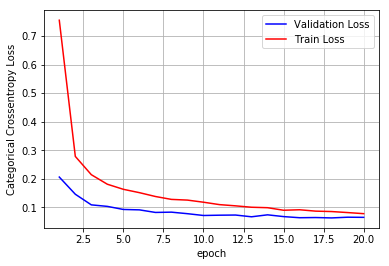

In [136]:
score = model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

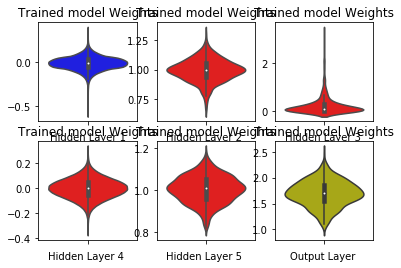

In [137]:
w_after = model2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 3, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(2, 3, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(2, 3, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Observations

All tha below architecutres are implemented with fixing <b>relu</b> as <b>activation function</b> and <b>adam</b> as <b>optimization technique</b>.<br>We found that whatever might be the architecture, the model was overfitting when implemented with neither dropout nor batch normalization and with just batch normalization.<br>The model is converging fine when implemented either with just dropout or with both dropout and batch normalization.

In [3]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Architecture", "NoOfNeurons/Layer", "BatchNormalization", "Dropouts", "Accuracy"]

x.add_row(["2 Hidden Layers","784-392-196-10","No","No","98.32%"])
x.add_row(["2 Hidden Layers","784-392-196-10","Yes","No","98.26%"])
x.add_row(["2 Hidden Layers","784-392-196-10","No","Yes","98.31%"])
x.add_row(["2 Hidden Layers","784-392-196-10","Yes","Yes","98.29%"])
x.add_row(["3 Hidden Layers","784-516-258-50-10","No","No","97.81%"])
x.add_row(["3 Hidden Layers","784-516-258-50-10","Yes","No","98.34%"])
x.add_row(["3 Hidden Layers","784-516-258-50-10","No","Yes","98.06%"])
x.add_row(["3 Hidden Layers","784-516-258-50-10","Yes","Yes","98.29%"])
x.add_row(["5 Hidden Layers","784-645-510-387-252-129-10","No","No","98.31%"])
x.add_row(["5 Hidden Layers","784-645-510-387-252-129-10","Yes","No","98.30%"])
x.add_row(["5 Hidden Layers","784-645-510-387-252-129-10","No","Yes","98.30%"])
x.add_row(["5 Hidden Layers","784-645-510-387-252-129-10","Yes","Yes","98.32%"])


print(x)

+-----------------+----------------------------+--------------------+----------+----------+
|   Architecture  |     NoOfNeurons/Layer      | BatchNormalization | Dropouts | Accuracy |
+-----------------+----------------------------+--------------------+----------+----------+
| 2 Hidden Layers |       784-392-196-10       |         No         |    No    |  98.32%  |
| 2 Hidden Layers |       784-392-196-10       |        Yes         |    No    |  98.26%  |
| 2 Hidden Layers |       784-392-196-10       |         No         |   Yes    |  98.31%  |
| 2 Hidden Layers |       784-392-196-10       |        Yes         |   Yes    |  98.29%  |
| 3 Hidden Layers |     784-516-258-50-10      |         No         |    No    |  97.81%  |
| 3 Hidden Layers |     784-516-258-50-10      |        Yes         |    No    |  98.34%  |
| 3 Hidden Layers |     784-516-258-50-10      |         No         |   Yes    |  98.06%  |
| 3 Hidden Layers |     784-516-258-50-10      |        Yes         |   Yes    |